In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Reading Data

In [3]:
data = pd.read_csv('Demo.csv', error_bad_lines=False, encoding = 'unicode_escape');
data_text = data[['tweet']]
data_text['index'] = data_text.index
documents = data_text

In [4]:
len(documents)

4006

In [5]:
documents[:5]

,tweet,index
0,RT @rssurjewala: Critical question: Was PayTM ...,0
1,RT @Hemant_80: Did you vote on #Demonetization...,1
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",2
3,RT @ANI_news: Gurugram (Haryana): Post office ...,3
4,RT @satishacharya: Reddy Wedding! @mail_today ...,4


In [6]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [7]:
import nltk

# Defining stemmer

In [8]:
stemmer = SnowballStemmer('english')
original_words = ['caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,caresses,caress
1,flies,fli
2,dies,die
3,mules,mule
4,denied,deni
5,died,die
6,agreed,agre
7,owned,own
8,humbled,humbl
9,sized,size


# Preprocessing

In [9]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

# Previewing preprocessor function

In [10]:
doc_sample = documents[documents['index'] == 4000].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))
#docc=(preprocess(doc_sample))

original document: 
['RT', '@ModiBharosa:', 'Putting', 'Nation', 'over', 'Party', 'Politics', '#nitishkumar', 'supports', 'PM', '@narendramodi', 'on', '#Demonetization', 'https://t.co/UodwXdPMmG']


 tokenized and lemmatized document: 
['modibharosa', 'put', 'nation', 'parti', 'polit', 'nitishkumar', 'support', 'narendramodi', 'demonet', 'https', 'uodwxdpmmg']


# Applying preprocessor on tweets

In [11]:
processed_docs = documents['tweet'].astype(str).map(preprocess)

In [12]:
import gensim
from gensim import corpora, models

# Creating the doc2bow dictionary for words in the dataset and applying the LDA model from gensim

In [13]:
wordDict = corpora.Dictionary(processed_docs)
docTermMatrix = [wordDict.doc2bow(doc) for doc in processed_docs]
Lda = gensim.models.ldamodel.LdaModel
model = Lda(docTermMatrix,num_topics=10,id2word=wordDict,passes=100)
print(model.print_topics(num_topics=10, num_words=10))

[(0, '0.140*"demonet" + 0.056*"support" + 0.054*"peopl" + 0.044*"https" + 0.041*"narendramodi" + 0.039*"modibharosa" + 0.036*"nation" + 0.036*"voter" + 0.036*"huge" + 0.016*"dasshaktikanta"'), (1, '0.075*"demonet" + 0.038*"https" + 0.025*"note" + 0.025*"peopl" + 0.020*"survey" + 0.015*"get" + 0.015*"help" + 0.014*"india" + 0.013*"lakh" + 0.013*"atm"'), (2, '0.115*"demonet" + 0.089*"go" + 0.086*"anilkoh" + 0.085*"parti" + 0.084*"reaction" + 0.083*"suffer" + 0.082*"loss" + 0.013*"opinion" + 0.013*"blackmoney" + 0.013*"hour"'), (3, '0.116*"demonet" + 0.112*"bank" + 0.108*"lakh" + 0.105*"terrorist" + 0.105*"loot" + 0.105*"kishtwar" + 0.104*"gauravcsaw" + 0.104*"incid" + 0.006*"onlin" + 0.004*"cash"'), (4, '0.059*"demonet" + 0.058*"https" + 0.017*"read" + 0.016*"view" + 0.014*"think" + 0.013*"ysrcp" + 0.011*"hpcl" + 0.011*"pmmodi" + 0.010*"media" + 0.009*"drive"'), (5, '0.082*"demonet" + 0.081*"question" + 0.079*"critic" + 0.078*"paytm" + 0.075*"requir" + 0.075*"inform" + 0.074*"clear" + 0.

In [14]:
model.print_topic(5)

'0.082*"demonet" + 0.081*"question" + 0.079*"critic" + 0.078*"paytm" + 0.075*"requir" + 0.075*"inform" + 0.074*"clear" + 0.074*"rssurjewala" + 0.074*"disclosur" + 0.074*"edict"'

# Visualization of the LDA model

In [18]:
import pyLDAvis.gensim

In [19]:
pyLDAvis.enable_notebook()

In [22]:
vis = pyLDAvis.gensim.prepare(model, docTermMatrix, dictionary=wordDict)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.152790  0.073891       1        1  17.845449
7     -0.027141 -0.051976       2        1  16.254951
6     -0.193817  0.134698       3        1  13.523640
9     -0.059654  0.036290       4        1  12.470484
3      0.291164  0.272430       5        1  12.275758
8     -0.003924 -0.089093       6        1   8.428703
1     -0.037548 -0.046096       7        1   6.724686
2      0.000326 -0.016812       8        1   4.950607
4     -0.042333 -0.102512       9        1   4.426489
5      0.225718 -0.210820      10        1   3.099237, topic_info=               Term        Freq       Total Category  logprob  loglift
51             bank  567.000000  567.000000  Default  30.0000  30.0000
57        terrorist  484.000000  484.000000  Default  29.0000  29.0000
56             loot  482.000000  482.000000  Default  28.0000  28.0000
54         kishtwar  482.000000  482.000000  Default  27.0000  27.0000
53            incid  482.000000  482.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
495           start    2.663996   25.076630  Topic10  -6.0790   1.2319
385         deposit    2.612971   25.728512  Topic10  -6.0984   1.1869
1292         report    1.245695    5.947227  Topic10  -6.8392   1.9108
26             cash    1.953737  111.871536  Topic10  -6.3891  -0.5736
724   centerofright    1.427962  180.441452  Topic10  -6.7026  -1.3651

[477 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
149      10  0.422734        absent
2304     10  0.840164          acct
255       2  0.965019        action
1138      9  0.830894           add
378       4  0.994969       address
...     ...       ...           ...
263       2  0.982911         write
1062      9  0.909016       ysjagan
1063      9  0.945661         ysrcp
254       6  0.957443  zeenewssport
148       8  0.747600    zetkrqqclx

[568 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 8, 7, 10, 4, 9, 2, 3, 5, 6])

From this analysis it is found that topic number 2,5,6,7,8 are plotted closer to each other in the graph as they talk more about demonetization and related terms such as money, bank, atm, note etc. where as the topic number 1,3 and 9 talk about goverment and related terms such as politics, vote, nation, people etc. hence they are close to each other but away from the other cluster of topics.

In [23]:
pyLDAvis.save_html(vis, 'lda.html')

# Plot of the word counts and the weights(importance) of each keyword in the same chart.

Plot just to find out the importance (weights) of the keywords in every topic. Hence, plotting the word counts and the weights of each keyword in the same chart.

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

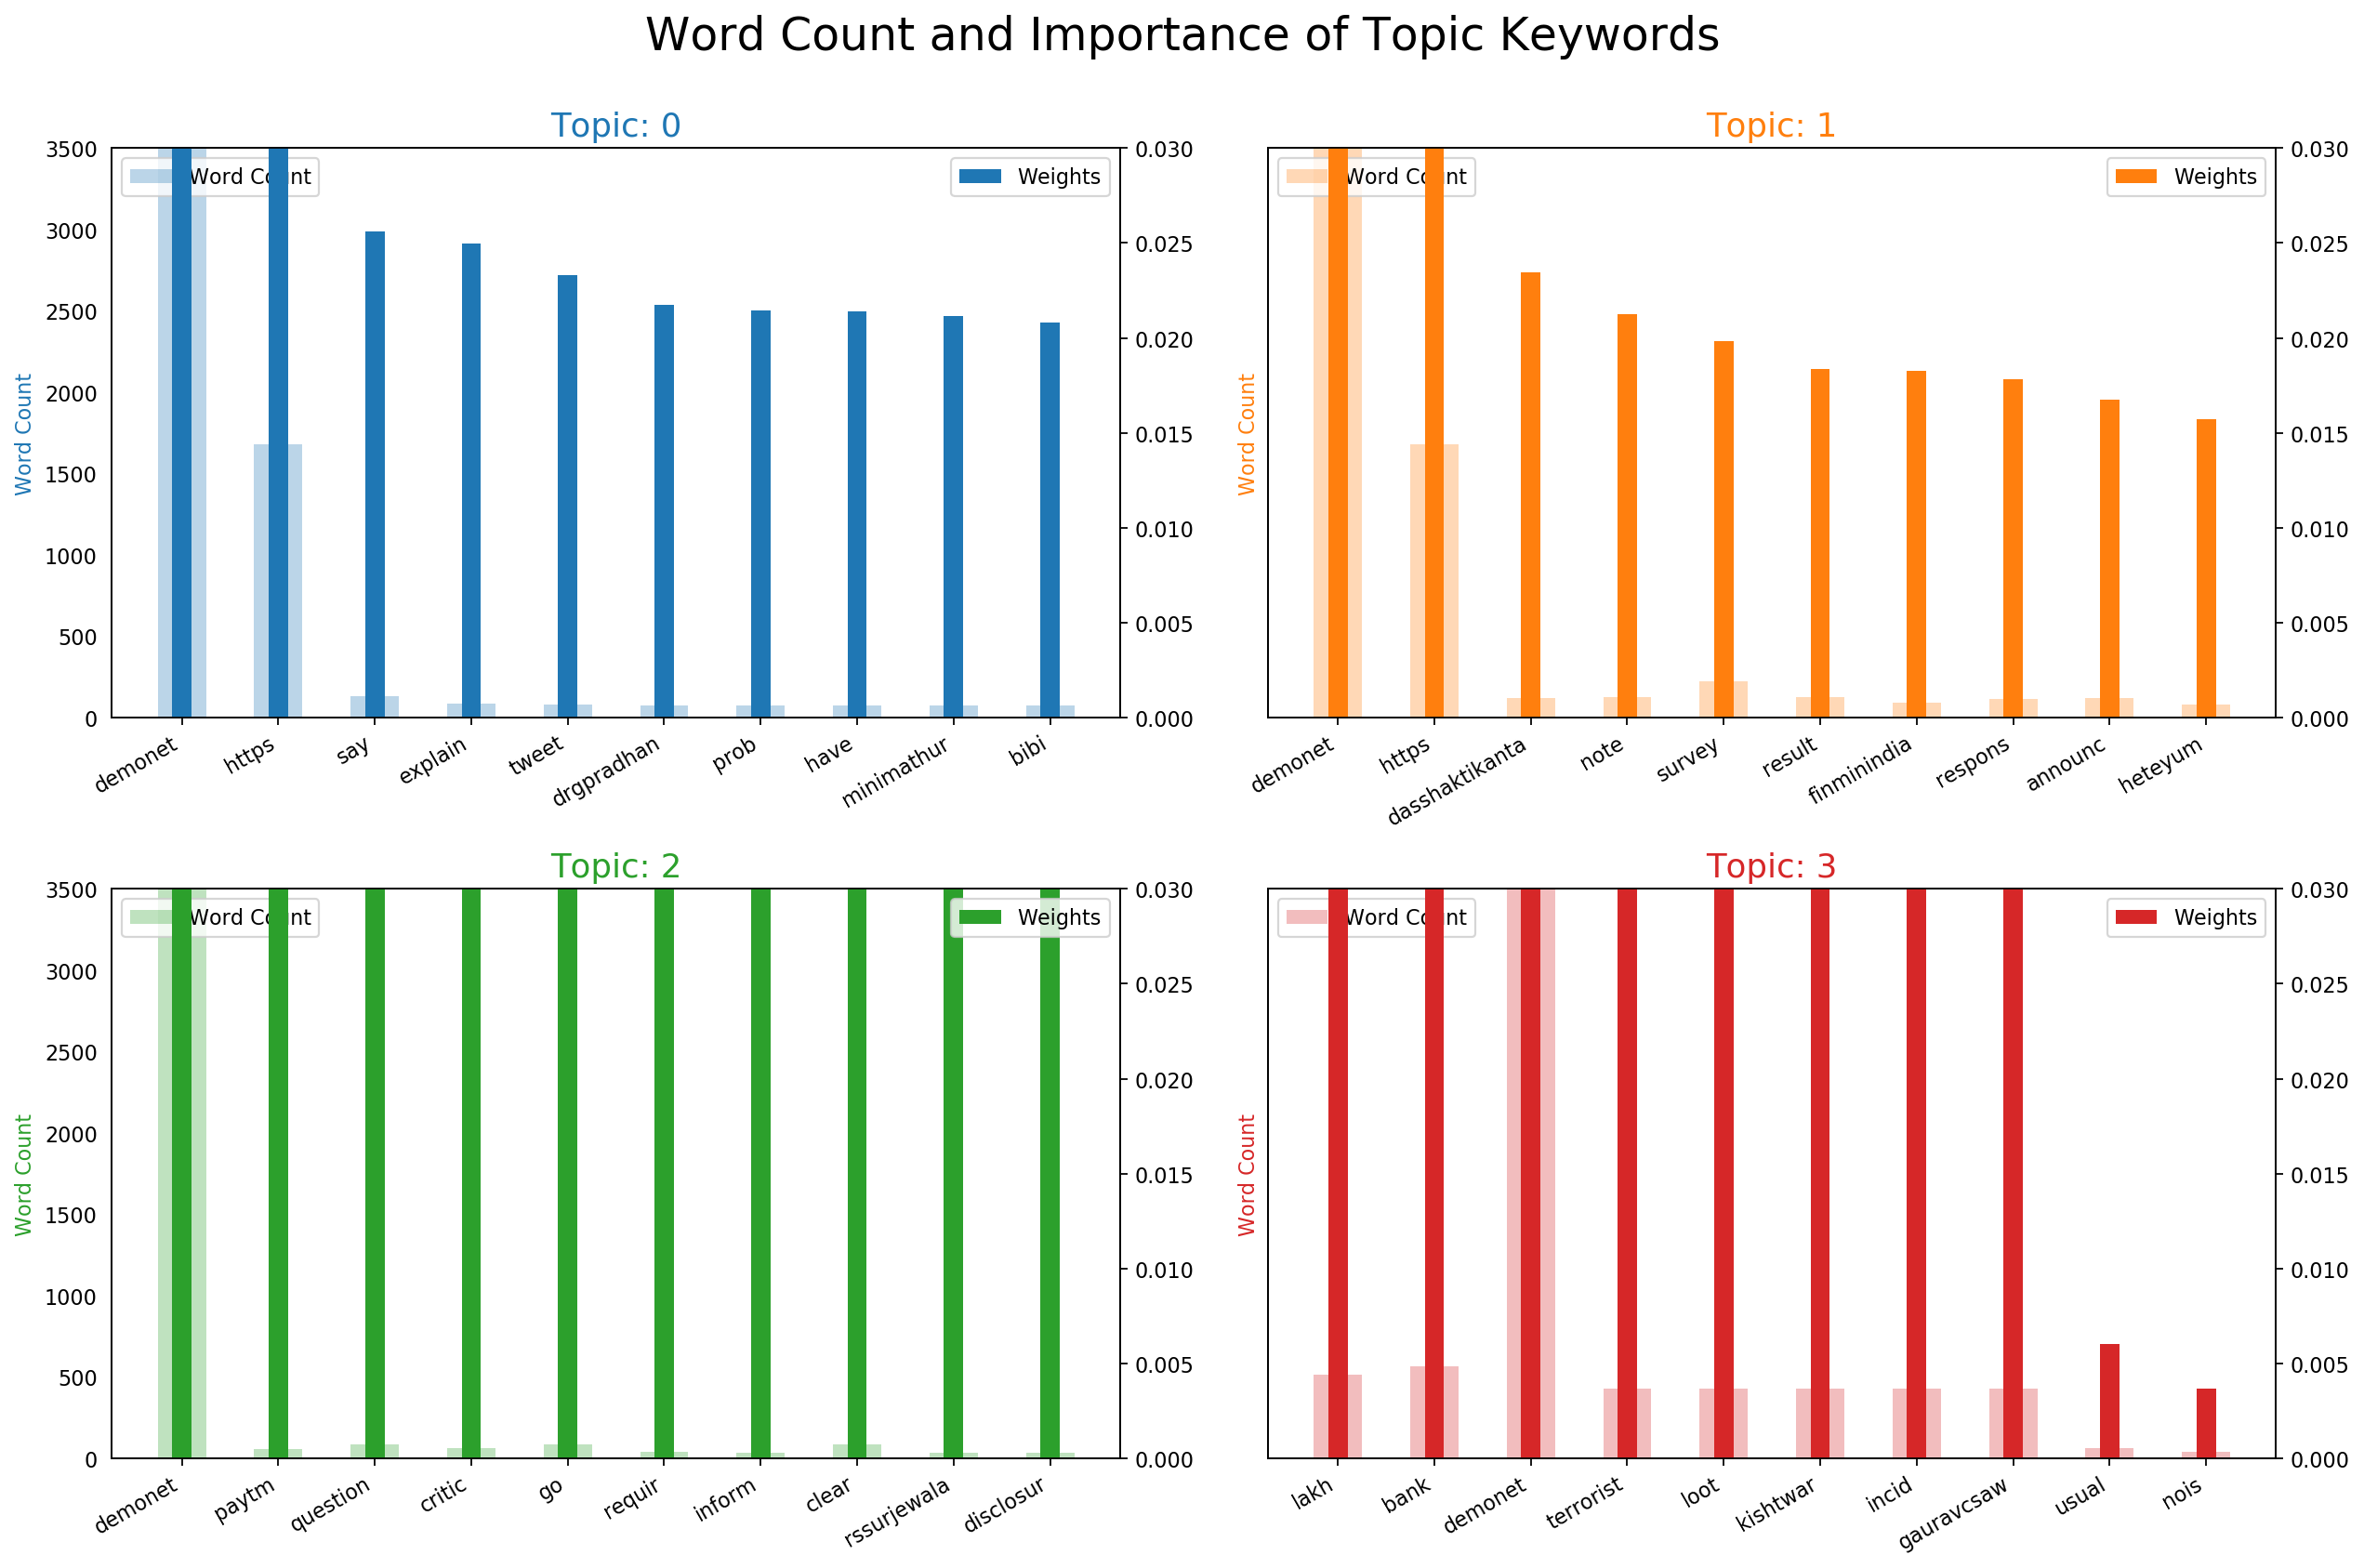

In [36]:
from collections import Counter
topics = model.show_topics(formatted=False)
data_flat = [w for w_list in processed_docs for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    